## numpy를 이용한 linear regression

In [1]:
import pandas as pd
import numpy as np
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['axes.unicode_minus'] = False

# f_path = "c:/Windows/Fonts/malgun.ttf"
f_path = "/Library/Fonts/AppleGothic.ttf"
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family=font_name)

## 다변 함수에 대한 선형 회귀 feat. Keras

In [9]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import RMSprop

np.random.seed(13)

Using TensorFlow backend.


In [11]:
raw_data = np.genfromtxt('./data/x09.txt', skip_header=36)
raw_data

array([[  1.,   1.,  84.,  46., 354.],
       [  2.,   1.,  73.,  20., 190.],
       [  3.,   1.,  65.,  52., 405.],
       [  4.,   1.,  70.,  30., 263.],
       [  5.,   1.,  76.,  57., 451.],
       [  6.,   1.,  69.,  25., 302.],
       [  7.,   1.,  63.,  28., 288.],
       [  8.,   1.,  72.,  36., 385.],
       [  9.,   1.,  79.,  57., 402.],
       [ 10.,   1.,  75.,  44., 365.],
       [ 11.,   1.,  27.,  24., 209.],
       [ 12.,   1.,  89.,  31., 290.],
       [ 13.,   1.,  65.,  52., 346.],
       [ 14.,   1.,  57.,  23., 254.],
       [ 15.,   1.,  59.,  60., 395.],
       [ 16.,   1.,  69.,  48., 434.],
       [ 17.,   1.,  60.,  34., 220.],
       [ 18.,   1.,  79.,  51., 374.],
       [ 19.,   1.,  75.,  50., 308.],
       [ 20.,   1.,  82.,  34., 220.],
       [ 21.,   1.,  59.,  46., 311.],
       [ 22.,   1.,  67.,  23., 181.],
       [ 23.,   1.,  85.,  37., 274.],
       [ 24.,   1.,  55.,  40., 303.],
       [ 25.,   1.,  63.,  30., 244.]])

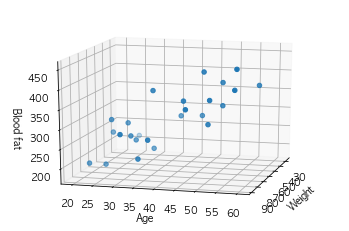

In [12]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

xs = np.array(raw_data[:,2], dtype=np.float32)
ys = np.array(raw_data[:,3], dtype=np.float32)
zs = np.array(raw_data[:,4], dtype=np.float32)

# fig = plt.figure(figsize=(12,12))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs, ys, zs)
ax.set_xlabel('Weight')
ax.set_ylabel('Age')
ax.set_zlabel('Blood fat')
ax.view_init(15,15)
plt.show()

In [13]:
x_data = np.array(raw_data[:,2:4], dtype=np.float32)
y_data = np.array(raw_data[:,4], dtype=np.float32)
y_data = y_data.reshape((25,1))

rmsprop = RMSprop(lr=0.01)

In [14]:
model = Sequential()
model.add(Dense(1, input_shape=(2,)))
model.compile(loss='mse', optimizer=RMSprop(lr=0.01))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


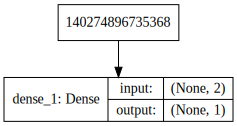

In [15]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
%matplotlib inline

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [16]:
hist = model.fit(x_data, y_data, epochs=1000)

Epoch 1/1000
25/25 [==============================] - 0s 4ms/step - loss: 134896.7344
Epoch 2/1000
25/25 [==============================] - 0s 34us/step - loss: 132375.2031
Epoch 3/1000
25/25 [==============================] - 0s 32us/step - loss: 130569.5000
Epoch 4/1000
25/25 [==============================] - 0s 28us/step - loss: 129071.4922
Epoch 5/1000
25/25 [==============================] - 0s 28us/step - loss: 127751.9062
Epoch 6/1000
25/25 [==============================] - 0s 29us/step - loss: 126550.8125
Epoch 7/1000
25/25 [==============================] - 0s 31us/step - loss: 125434.8438
Epoch 8/1000
25/25 [==============================] - 0s 31us/step - loss: 124383.3125
Epoch 9/1000
25/25 [==============================] - 0s 32us/step - loss: 123382.3203
Epoch 10/1000
25/25 [==============================] - 0s 34us/step - loss: 122422.1016
Epoch 11/1000
25/25 [==============================] - 0s 28us/step - loss: 121495.4531
Epoch 12/1000
25/25 [=====================

Epoch 95/1000
25/25 [==============================] - 0s 45us/step - loss: 66771.5625
Epoch 96/1000
25/25 [==============================] - 0s 42us/step - loss: 66237.3438
Epoch 97/1000
25/25 [==============================] - 0s 40us/step - loss: 65705.4766
Epoch 98/1000
25/25 [==============================] - 0s 40us/step - loss: 65175.9453
Epoch 99/1000
25/25 [==============================] - 0s 40us/step - loss: 64648.7617
Epoch 100/1000
25/25 [==============================] - 0s 44us/step - loss: 64123.9297
Epoch 101/1000
25/25 [==============================] - 0s 44us/step - loss: 63601.4336
Epoch 102/1000
25/25 [==============================] - 0s 41us/step - loss: 63081.2852
Epoch 103/1000
25/25 [==============================] - 0s 40us/step - loss: 62563.4844
Epoch 104/1000
25/25 [==============================] - 0s 61us/step - loss: 62048.0312
Epoch 105/1000
25/25 [==============================] - 0s 44us/step - loss: 61534.9102
Epoch 106/1000
25/25 [===============

25/25 [==============================] - 0s 38us/step - loss: 27058.5859
Epoch 189/1000
25/25 [==============================] - 0s 75us/step - loss: 26740.1543
Epoch 190/1000
25/25 [==============================] - 0s 46us/step - loss: 26424.0059
Epoch 191/1000
25/25 [==============================] - 0s 46us/step - loss: 26110.1445
Epoch 192/1000
25/25 [==============================] - 0s 48us/step - loss: 25798.5684
Epoch 193/1000
25/25 [==============================] - 0s 57us/step - loss: 25489.2656
Epoch 194/1000
25/25 [==============================] - 0s 37us/step - loss: 25182.2480
Epoch 195/1000
25/25 [==============================] - 0s 37us/step - loss: 24877.5098
Epoch 196/1000
25/25 [==============================] - 0s 54us/step - loss: 24575.0508
Epoch 197/1000
25/25 [==============================] - 0s 45us/step - loss: 24274.8633
Epoch 198/1000
25/25 [==============================] - 0s 37us/step - loss: 23976.9570
Epoch 199/1000
25/25 [=========================

Epoch 282/1000
25/25 [==============================] - 0s 46us/step - loss: 6906.5371
Epoch 283/1000
25/25 [==============================] - 0s 55us/step - loss: 6794.9702
Epoch 284/1000
25/25 [==============================] - 0s 38us/step - loss: 6685.4531
Epoch 285/1000
25/25 [==============================] - 0s 48us/step - loss: 6577.9756
Epoch 286/1000
25/25 [==============================] - 0s 57us/step - loss: 6472.5332
Epoch 287/1000
25/25 [==============================] - 0s 60us/step - loss: 6369.1191
Epoch 288/1000
25/25 [==============================] - 0s 48us/step - loss: 6267.7275
Epoch 289/1000
25/25 [==============================] - 0s 46us/step - loss: 6168.3511
Epoch 290/1000
25/25 [==============================] - 0s 82us/step - loss: 6070.9844
Epoch 291/1000
25/25 [==============================] - 0s 40us/step - loss: 5975.6162
Epoch 292/1000
25/25 [==============================] - 0s 41us/step - loss: 5882.2451
Epoch 293/1000
25/25 [=====================

25/25 [==============================] - 0s 32us/step - loss: 3219.4712
Epoch 377/1000
25/25 [==============================] - 0s 61us/step - loss: 3211.1609
Epoch 378/1000
25/25 [==============================] - 0s 43us/step - loss: 3202.7932
Epoch 379/1000
25/25 [==============================] - 0s 44us/step - loss: 3194.3743
Epoch 380/1000
25/25 [==============================] - 0s 40us/step - loss: 3185.9131
Epoch 381/1000
25/25 [==============================] - 0s 45us/step - loss: 3177.4160
Epoch 382/1000
25/25 [==============================] - 0s 37us/step - loss: 3168.8875
Epoch 383/1000
25/25 [==============================] - 0s 31us/step - loss: 3160.3357
Epoch 384/1000
25/25 [==============================] - 0s 30us/step - loss: 3151.7654
Epoch 385/1000
25/25 [==============================] - 0s 35us/step - loss: 3143.1819
Epoch 386/1000
25/25 [==============================] - 0s 29us/step - loss: 3134.5908
Epoch 387/1000
25/25 [==============================] - 0s

Epoch 471/1000
25/25 [==============================] - 0s 32us/step - loss: 2504.8159
Epoch 472/1000
25/25 [==============================] - 0s 26us/step - loss: 2498.7795
Epoch 473/1000
25/25 [==============================] - 0s 47us/step - loss: 2492.7957
Epoch 474/1000
25/25 [==============================] - 0s 43us/step - loss: 2486.9714
Epoch 475/1000
25/25 [==============================] - 0s 38us/step - loss: 2481.0801
Epoch 476/1000
25/25 [==============================] - 0s 34us/step - loss: 2475.2686
Epoch 477/1000
25/25 [==============================] - 0s 42us/step - loss: 2469.2356
Epoch 478/1000
25/25 [==============================] - 0s 42us/step - loss: 2463.3435
Epoch 479/1000
25/25 [==============================] - 0s 27us/step - loss: 2457.4697
Epoch 480/1000
25/25 [==============================] - 0s 28us/step - loss: 2451.6697
Epoch 481/1000
25/25 [==============================] - 0s 28us/step - loss: 2445.8889
Epoch 482/1000
25/25 [=====================

25/25 [==============================] - 0s 42us/step - loss: 2065.3625
Epoch 566/1000
25/25 [==============================] - 0s 57us/step - loss: 2062.0735
Epoch 567/1000
25/25 [==============================] - 0s 42us/step - loss: 2058.7852
Epoch 568/1000
25/25 [==============================] - 0s 47us/step - loss: 2055.5527
Epoch 569/1000
25/25 [==============================] - 0s 52us/step - loss: 2052.3218
Epoch 570/1000
25/25 [==============================] - 0s 51us/step - loss: 2049.1484
Epoch 571/1000
25/25 [==============================] - 0s 45us/step - loss: 2045.9742
Epoch 572/1000
25/25 [==============================] - 0s 94us/step - loss: 2042.8584
Epoch 573/1000
25/25 [==============================] - 0s 68us/step - loss: 2039.7417
Epoch 574/1000
25/25 [==============================] - 0s 94us/step - loss: 2036.6840
Epoch 575/1000
25/25 [==============================] - 0s 55us/step - loss: 2033.6232
Epoch 576/1000
25/25 [==============================] - 0s

Epoch 660/1000
25/25 [==============================] - 0s 73us/step - loss: 1874.4814
Epoch 661/1000
25/25 [==============================] - 0s 44us/step - loss: 1873.6948
Epoch 662/1000
25/25 [==============================] - 0s 50us/step - loss: 1872.9583
Epoch 663/1000
25/25 [==============================] - 0s 52us/step - loss: 1872.2170
Epoch 664/1000
25/25 [==============================] - 0s 50us/step - loss: 1871.5255
Epoch 665/1000
25/25 [==============================] - 0s 68us/step - loss: 1870.8278
Epoch 666/1000
25/25 [==============================] - 0s 39us/step - loss: 1870.1798
Epoch 667/1000
25/25 [==============================] - 0s 48us/step - loss: 1869.5258
Epoch 668/1000
25/25 [==============================] - 0s 34us/step - loss: 1868.9208
Epoch 669/1000
25/25 [==============================] - 0s 33us/step - loss: 1868.3091
Epoch 670/1000
25/25 [==============================] - 0s 72us/step - loss: 1867.7461
Epoch 671/1000
25/25 [=====================

Epoch 755/1000
25/25 [==============================] - 0s 37us/step - loss: 1855.0637
Epoch 756/1000
25/25 [==============================] - 0s 58us/step - loss: 1855.0253
Epoch 757/1000
25/25 [==============================] - 0s 37us/step - loss: 1854.9850
Epoch 758/1000
25/25 [==============================] - 0s 46us/step - loss: 1854.9463
Epoch 759/1000
25/25 [==============================] - 0s 55us/step - loss: 1854.9058
Epoch 760/1000
25/25 [==============================] - 0s 41us/step - loss: 1854.8676
Epoch 761/1000
25/25 [==============================] - 0s 45us/step - loss: 1854.8275
Epoch 762/1000
25/25 [==============================] - 0s 49us/step - loss: 1854.7896
Epoch 763/1000
25/25 [==============================] - 0s 55us/step - loss: 1854.7493
Epoch 764/1000
25/25 [==============================] - 0s 42us/step - loss: 1854.7111
Epoch 765/1000
25/25 [==============================] - 0s 34us/step - loss: 1854.6708
Epoch 766/1000
25/25 [=====================

25/25 [==============================] - 0s 42us/step - loss: 1851.4453
Epoch 850/1000
25/25 [==============================] - 0s 32us/step - loss: 1851.4084
Epoch 851/1000
25/25 [==============================] - 0s 54us/step - loss: 1851.3695
Epoch 852/1000
25/25 [==============================] - 0s 39us/step - loss: 1851.3317
Epoch 853/1000
25/25 [==============================] - 0s 51us/step - loss: 1851.2928
Epoch 854/1000
25/25 [==============================] - 0s 47us/step - loss: 1851.2561
Epoch 855/1000
25/25 [==============================] - 0s 37us/step - loss: 1851.2166
Epoch 856/1000
25/25 [==============================] - 0s 33us/step - loss: 1851.1801
Epoch 857/1000
25/25 [==============================] - 0s 31us/step - loss: 1851.1401
Epoch 858/1000
25/25 [==============================] - 0s 30us/step - loss: 1851.1038
Epoch 859/1000
25/25 [==============================] - 0s 30us/step - loss: 1851.0646
Epoch 860/1000
25/25 [==============================] - 0s

Epoch 944/1000
25/25 [==============================] - 0s 40us/step - loss: 1847.8531
Epoch 945/1000
25/25 [==============================] - 0s 36us/step - loss: 1847.8146
Epoch 946/1000
25/25 [==============================] - 0s 37us/step - loss: 1847.7781
Epoch 947/1000
25/25 [==============================] - 0s 33us/step - loss: 1847.7394
Epoch 948/1000
25/25 [==============================] - 0s 45us/step - loss: 1847.7032
Epoch 949/1000
25/25 [==============================] - 0s 36us/step - loss: 1847.6647
Epoch 950/1000
25/25 [==============================] - 0s 31us/step - loss: 1847.6284
Epoch 951/1000
25/25 [==============================] - 0s 35us/step - loss: 1847.5897
Epoch 952/1000
25/25 [==============================] - 0s 40us/step - loss: 1847.5531
Epoch 953/1000
25/25 [==============================] - 0s 31us/step - loss: 1847.5146
Epoch 954/1000
25/25 [==============================] - 0s 29us/step - loss: 1847.4781
Epoch 955/1000
25/25 [=====================

In [17]:
print(hist.history.keys())

dict_keys(['loss'])


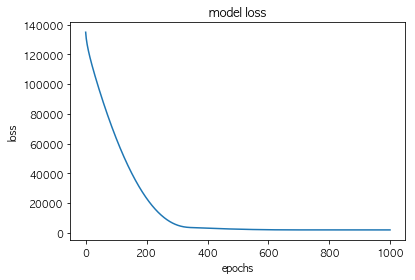

In [18]:
plt.plot(hist.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.show()

In [19]:
model.predict(np.array([100,44]).reshape(1,2))

array([[372.68344]], dtype=float32)

In [20]:
model.predict(np.array([60,25]).reshape(1,2))

array([[219.60904]], dtype=float32)

In [21]:
W_, b_ = model.get_weights()
print('Weight is : ', W_)
print('bias is : ', b_)

Weight is :  [[1.1937457]
 [5.543399 ]]
bias is :  [9.399319]


In [22]:
x = np.linspace(20,100,50).reshape(50,1)
y = np.linspace(10,70,50).reshape(50,1)

X = np.concatenate((x,y), axis=1)
Z = np.matmul(X, W_) + b_

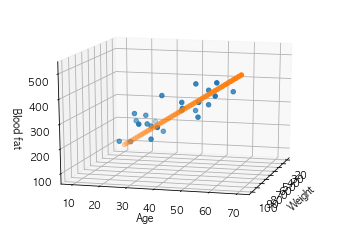

In [23]:
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs, ys, zs)
ax.scatter(x, y, Z)
ax.set_xlabel('Weight')
ax.set_ylabel('Age')
ax.set_zlabel('Blood fat')
ax.view_init(15,15)
plt.show()